### Prueba de normalidad

In [18]:
import pandas as pd

In [19]:
cont = pd.read_csv('https://bit.ly/31B56KB')
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


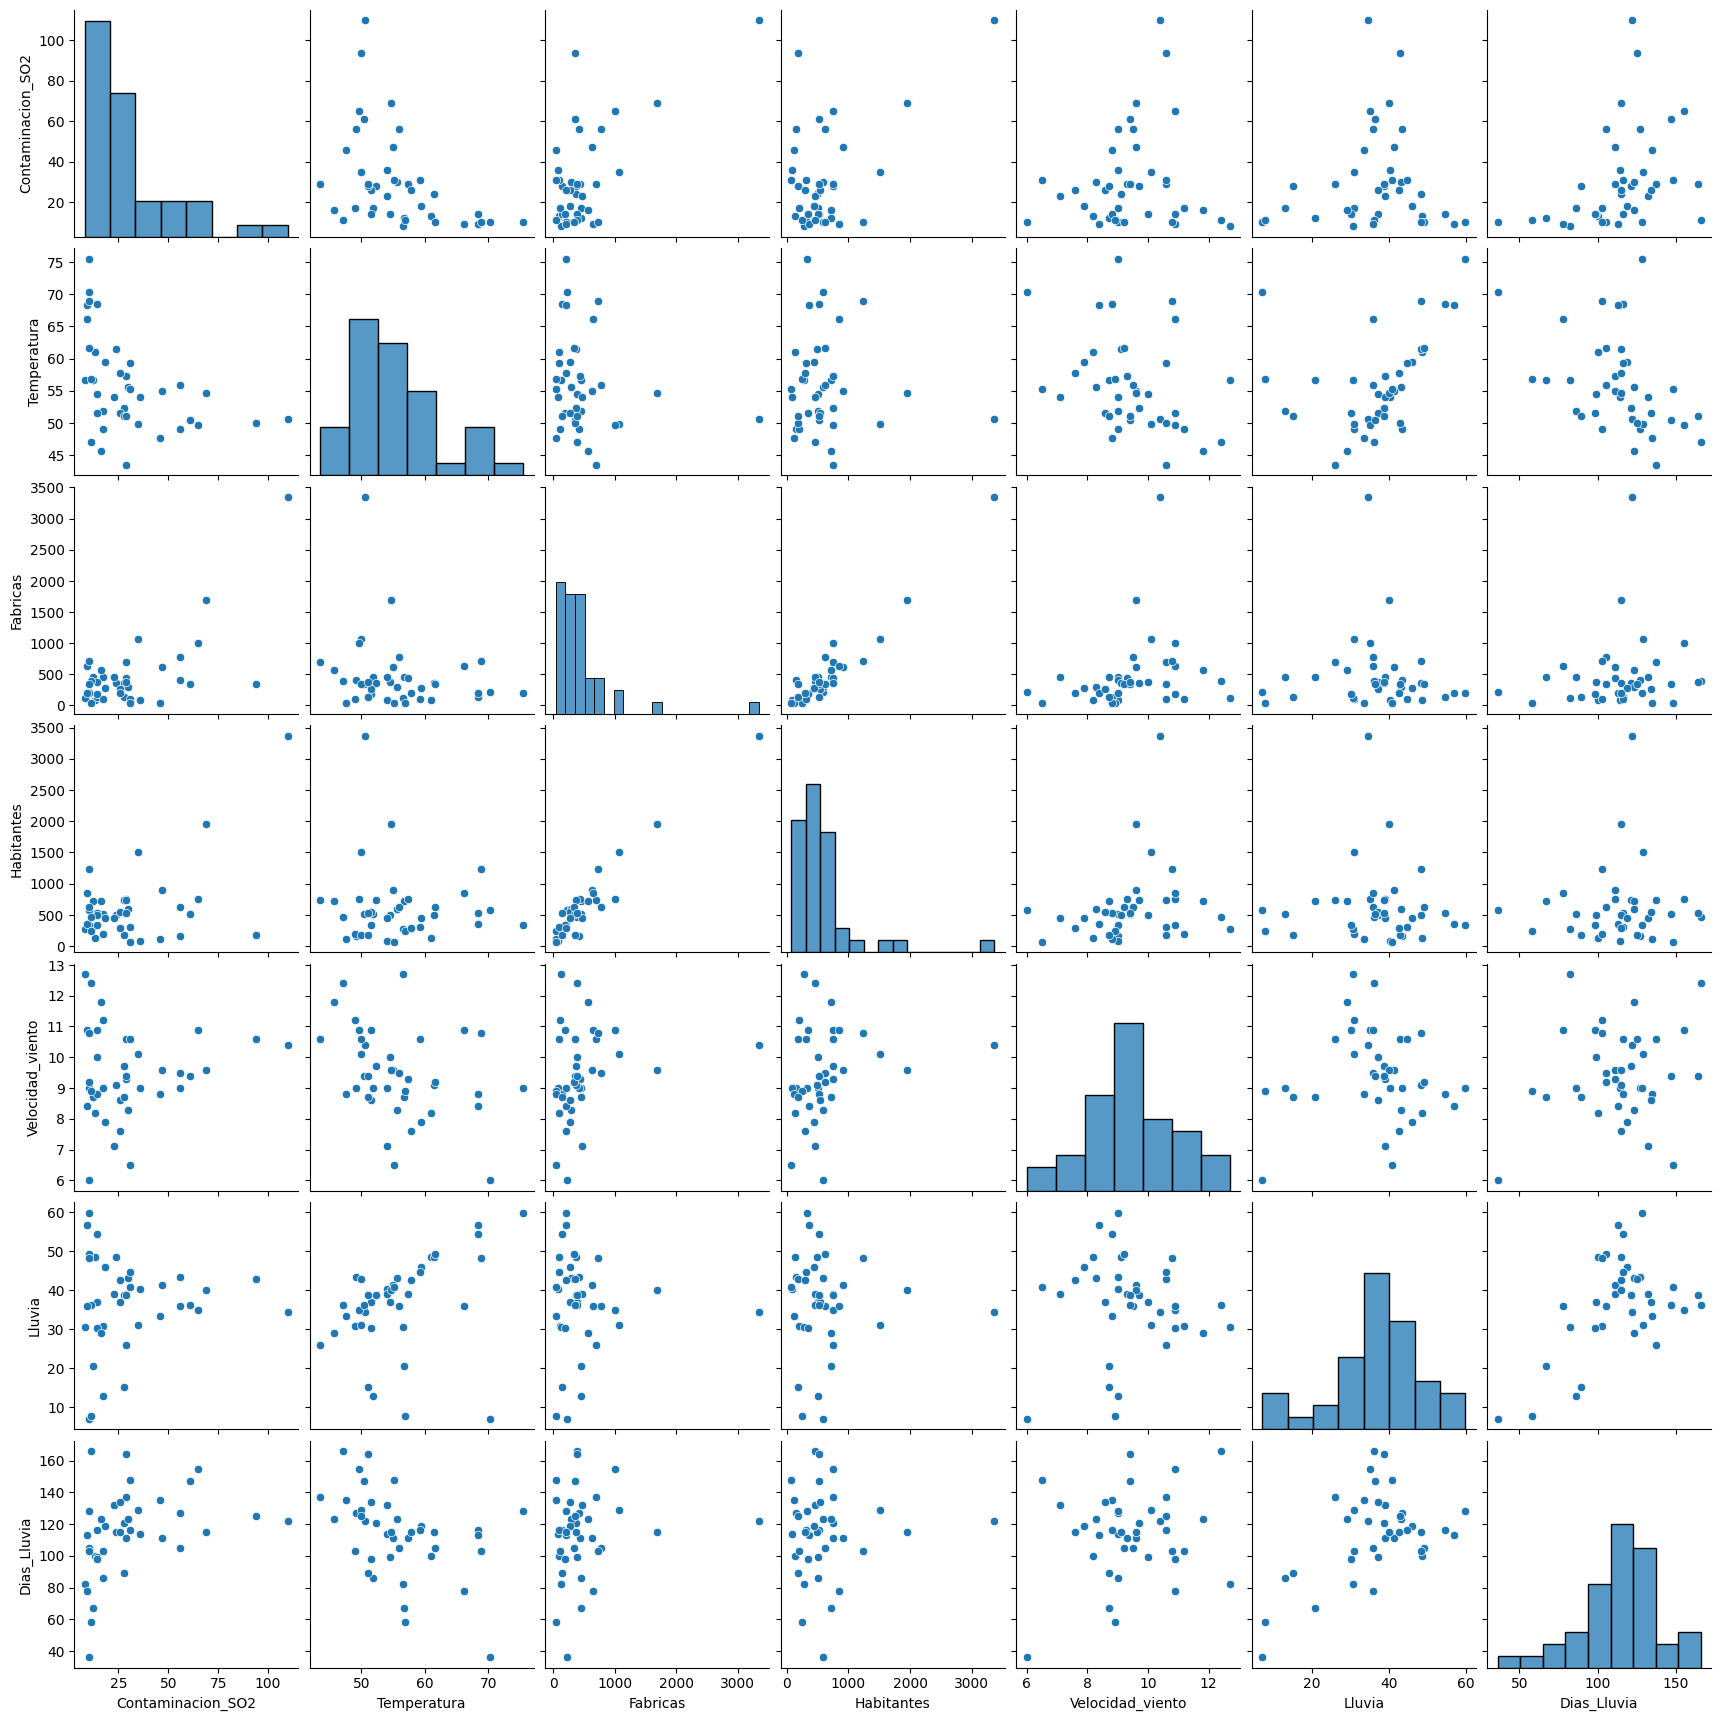

In [20]:
import seaborn as sns
sns.pairplot(cont)

**Regla de plata:** *Si hay interferencia humana, es casi seguro que no tendrá distribución normal.*

In [21]:
import scipy.stats as stats
import pylab

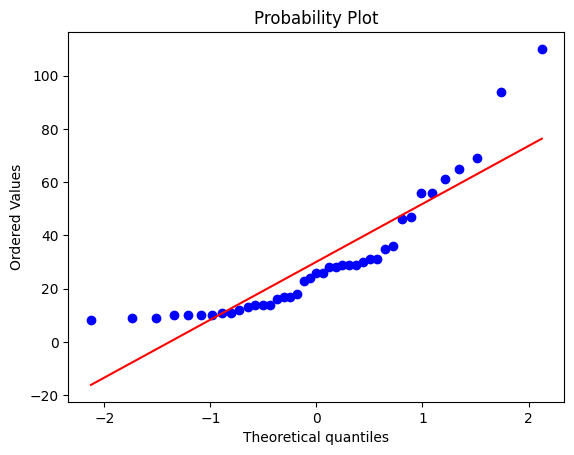

In [22]:
stats.probplot(cont.Contaminacion_SO2, dist='norm', plot=pylab)
pylab.show()

In [23]:
_, p_value = stats.shapiro(cont.Contaminacion_SO2)
print('p_value =', p_value)

p_value = 9.723376400158192e-06


`p_value` $< 0.05$ $\Rightarrow$ No tiene distribución normal

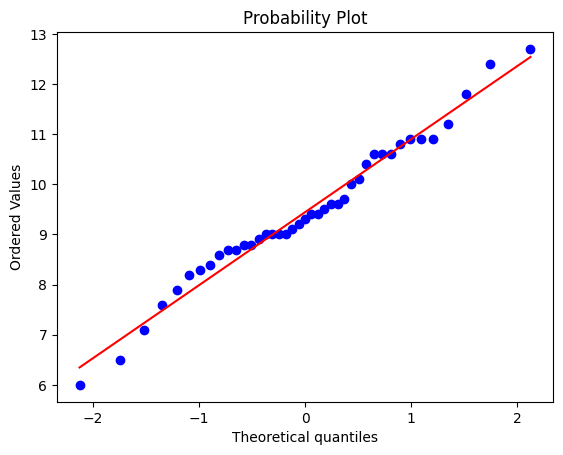

In [24]:
stats.probplot(cont.Velocidad_viento, dist='norm', plot=pylab)
pylab.show()

In [25]:
_, p_value = stats.shapiro(cont.Velocidad_viento)
print('p_value = ', p_value)

p_value =  0.6972579783041464


Función para encontrar anomalías en los datos.

In [26]:
import numpy as np

In [27]:
# Conjunto de datos ficticio con distribución normal
data = np.random.randn(50000) * 20 + 20

In [28]:
def find_anomalies(data, cut=3):
    anomalies = []
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut = cut * data_std
    low_lim = data_mean - anomaly_cut
    upp_lim = data_mean + anomaly_cut
    for d in data:
        if d > upp_lim or d < low_lim:
            anomalies.append(d)
    return anomalies

In [29]:
len(find_anomalies(data))

115

<Axes: >

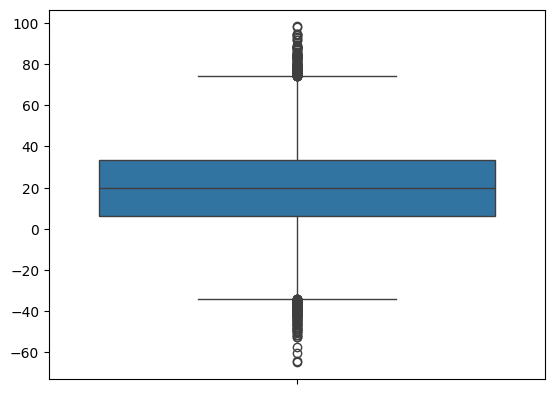

In [30]:
sns.boxplot(data)

In [32]:
import matplotlib.pyplot as plt

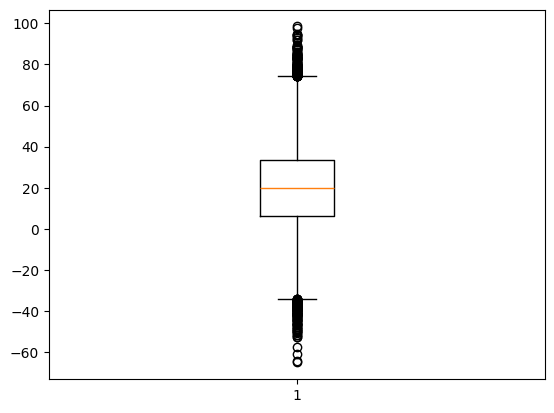

In [33]:
bp = plt.boxplot(x=data)

In [34]:
type(bp)

dict

In [36]:
bp.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [37]:
bp['fliers']

Recuperar outliers

In [35]:
bp['fliers'][0].get_data()[1].shape

(333,)

In [41]:
url = 'https://bit.ly/47bBIcL'
stocks = pd.read_csv(url, header='infer')
stocks.drop(['Date'], axis=1, inplace=True)
stocks.head()

,MSFT,F,BAC
0,29.860001,7.51,53.330002
1,29.809999,7.70,53.669998
2,29.639999,7.62,53.240002
3,29.930000,7.73,53.450001
4,29.959999,7.79,53.500000


<Axes: >

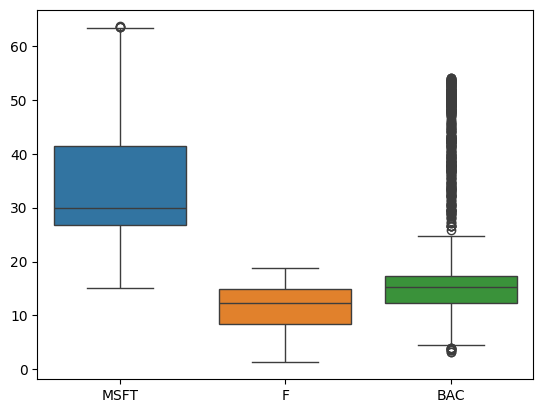

In [42]:
sns.boxplot(data=stocks)

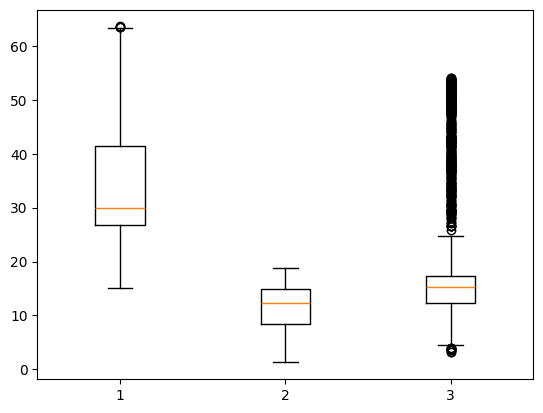

In [44]:
bp = plt.boxplot(x=stocks)

Microsoft

In [45]:
bp['fliers'][0].get_data()[1].shape

(4,)

Ford

In [46]:
bp['fliers'][1].get_data()[1].shape

(0,)

BAC

In [47]:
bp['fliers'][2].get_data()[1].shape

(441,)

Tarea moral: función para obtener anomalías usando los cuartiles.

### Selección de características significativas

PCA

In [49]:
import plotly.express as px

In [50]:
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='petal_length', z='petal_width', color='species')
fig.show()

In [51]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
df_wine.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


Separar datos

In [54]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Estandarizar

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Matriz de covarianza y eigenpares

In [56]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals = ', eigen_vals)

Eigenvals =  [4.7271078  2.64127236 1.51223622 0.90321724 0.89410421 0.56713483
 0.51460951 0.09413655 0.35618913 0.15783204 0.28084317 0.24772536
 0.20928264]


Gráfica con los aportes de cada eigenval

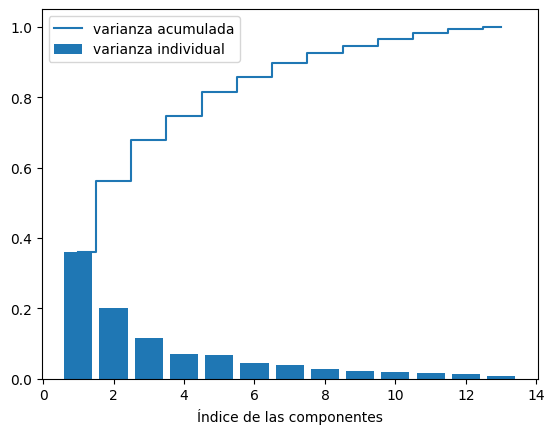

In [58]:
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, label='varianza individual', align='center')
plt.step(range(1,14), cum_var_exp, label='varianza acumulada', where='mid')
plt.xlabel('Índice de las componentes')
plt.legend(loc='best')
plt.show()